In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto, norm, poisson
from scipy.optimize import minimize

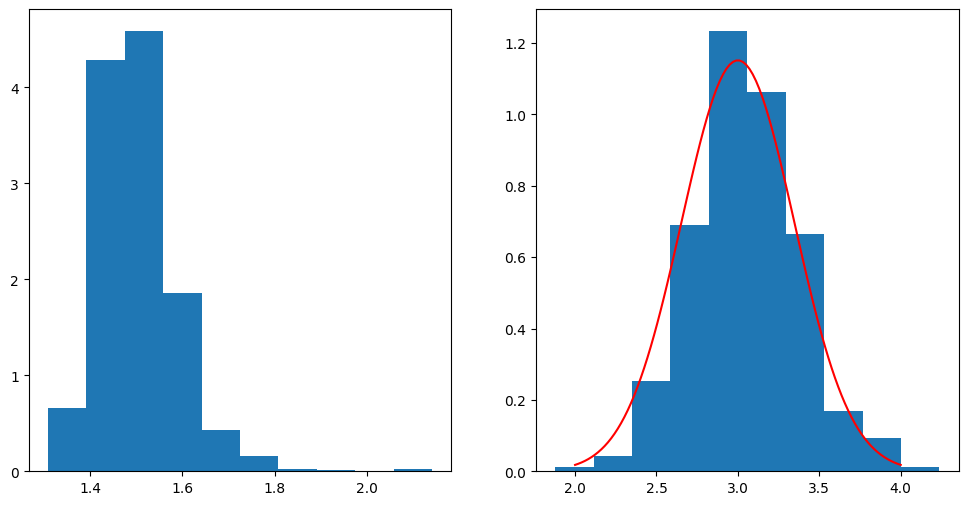

In [2]:
# Example 4: Simulation verification of the theoretical results

theta = 3  # choose some positive number for the true value of the parameter
n = 100  # choose sample size
R = 1000  # number of replications

est = np.zeros(R)  # empty array to store the results
for i in range(R):
    x = pareto.rvs(theta, size=n)  # generate Pareto samples
    est[i] = np.mean(x)

thetahat = est / (est - 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(est, density=True)
plt.subplot(1, 2, 2)
plt.hist(thetahat, density=True)

mean_thetahat = np.mean(thetahat)
sd_thetahat = np.std(thetahat)
# Do these match the theoretical formula?
sd_theory = np.sqrt(theta * (theta - 1) ** 2 / (theta - 2)) / np.sqrt(n)

grid = np.linspace(2, 4, 100)  # grid for plotting the normal density overlayed
plt.subplot(1, 2, 2)
plt.plot(grid, norm.pdf(grid, theta, sd_theory), color='red')

/var/folders/pq/pzj9g_pd2vl6fsmjt6t01msw0000gn/T/ipykernel_66878/2655204135.py:14: RuntimeWarning: divide by zero encountered in log
  return n * np.log(lambda_val) - lambda_val * np.sum(x)


Text(0.5, 1.0, 'Loglikelihood')

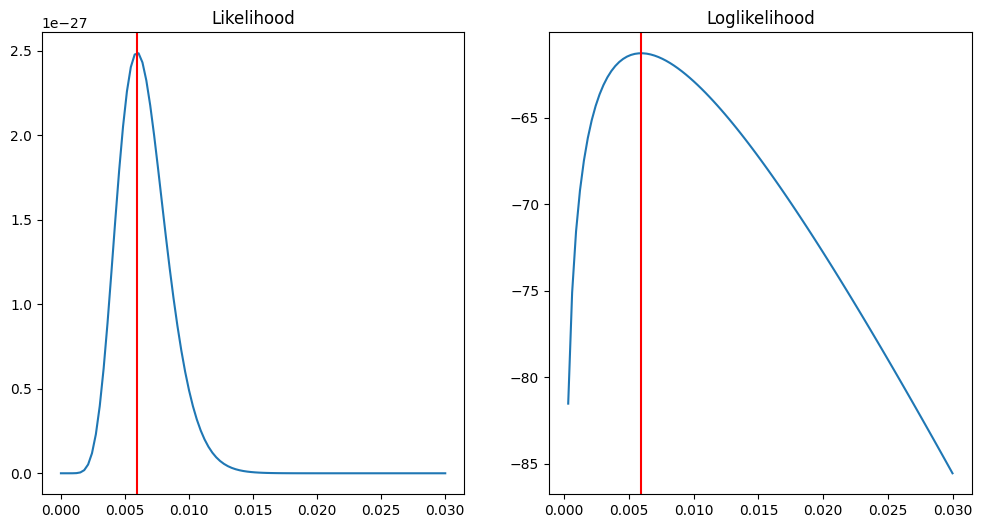

In [3]:
# Exponential example
x = np.array([225, 171, 198, 189, 189, 135, 162, 135, 117, 162])  # data
n = len(x)

# create a grid for the graph
lambda_vals = np.linspace(0, 0.03, 100)

# likelihood
def L(lambda_val):
    return lambda_val**n * np.exp(-lambda_val * np.sum(x))

# loglikelihood
def l(lambda_val):
    return n * np.log(lambda_val) - lambda_val * np.sum(x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lambda_vals, L(lambda_vals), label='Likelihood')
plt.axvline(1/np.mean(x), color='red')
plt.title("Likelihood")
plt.subplot(1, 2, 2)
plt.plot(lambda_vals, l(lambda_vals), label='Loglikelihood')
plt.axvline(1/np.mean(x), color='red')
plt.title("Loglikelihood")

Text(0.5, 1.0, 'Loglikelihood, n = 3')

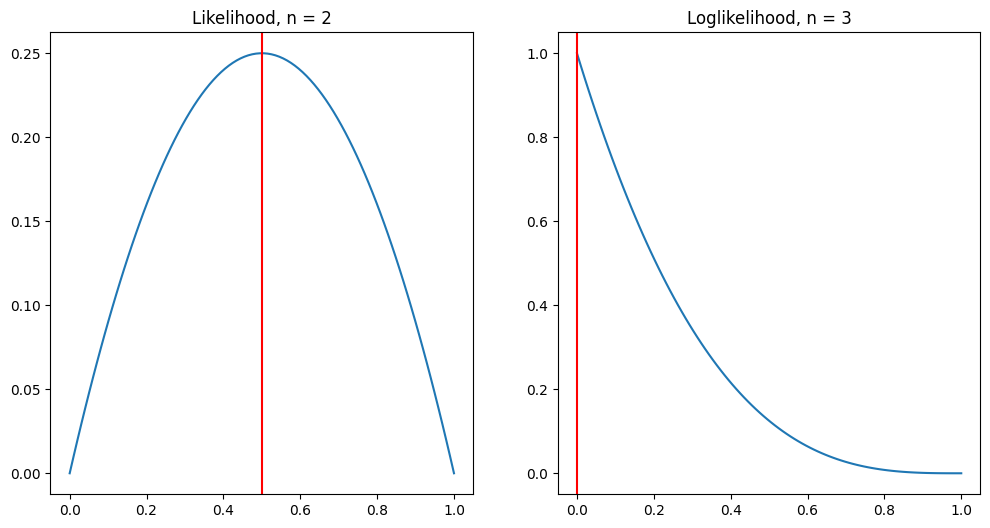

In [4]:
# Bernoulli example
x = np.array([1, 0])
def L_Bern(p):
    return p**np.sum(x) * (1 - p)**np.sum(1 - x)

p = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(p, L_Bern(p), label='Likelihood, n = 2')
plt.axvline(np.mean(x), color='red')
plt.title("Likelihood, n = 2")

x = np.array([0, 0, 0])
plt.subplot(1, 2, 2)
plt.plot(p, L_Bern(p), label='Loglikelihood, n = 3')
plt.axvline(np.mean(x), color='red')
plt.title("Loglikelihood, n = 3")

In [5]:
# Poisson MLE
x = np.array([26, 17, 13, 12, 20, 5, 9, 8, 5, 4, 8])  # The data

# The negative log-likelihood function
def nLL(lambda_val):
    return -np.sum(poisson.logpmf(x, lambda_val))

result = minimize(nLL, x0=5)  # uses the default method
lambda_mle = result.x[0]
lambda_mle

# Sanity check:
mean_x = np.mean(x)
mean_x

np.float64(11.545454545454545)